In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys                                                                              
np.random.seed(1)                                                                       
import tensorflow as tf                                                                 
tf.random.set_seed(2)
from tensorflow.keras.models import Sequential, load_model                              
from tensorflow.keras.layers import Dense, LSTM , Dropout, BatchNormalization                                     
from tensorflow.keras.optimizers import Adam,RMSprop                                             
from tensorflow.keras.callbacks import EarlyStopping                                   
from sklearn.preprocessing import MinMaxScaler                                          
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error  
from math import sqrt
from keras import optimizers
import datetime as dt
from datetime import date,datetime
import time
plt.style.use('ggplot')                                                                 

c:\Users\LAP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [125]:
# #Dừng sớm qtr huấn luyện nếu 0 có cải thiện trong việc giảm thiểu mất mát trên valid
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')  
# callbacks_list = [earlystop]                                                                          

In [ ]:
data = pd.read_csv('D:\Đồ án TN\sentiment_analysis\sentiment_score1.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

In [127]:
# def fit_model_LSTM(train, val, timesteps, hl, lr, batch, epochs):
#     np.random.seed(1)
#     tf.random.set_seed(2)

#     X_train, Y_train, X_val, Y_val = [], [], [], []

#     # Chuẩn bị dữ liệu cho tập train
#     for i in range(timesteps, train.shape[0]):  
#         X_train.append(train[i-timesteps:i])  
#         Y_train.append(train[i][0])  
#     X_train, Y_train = np.array(X_train), np.array(Y_train)

#     # Chuẩn bị dữ liệu cho tập validation
#     for i in range(timesteps, val.shape[0]):
#         X_val.append(val[i-timesteps:i])
#         Y_val.append(val[i][0])
#     X_val, Y_val = np.array(X_val), np.array(Y_val)

#     # Xác định số đặc trưng
#     input_shape = (X_train.shape[1], X_train.shape[2])

#     # Xây dựng model
#     model = Sequential()
#     model.add(LSTM(hl[0], input_shape=input_shape, activation='relu', return_sequences=True))
    
#     for i in range(1, len(hl)-1):  
#         model.add(LSTM(hl[i], activation='relu', return_sequences=True))  
#         # model.add(Dropout(0.2))
#     model.add(LSTM(hl[-1], activation='relu', return_sequences=False))
    
#     model.add(Dense(1))  

#     # Biên dịch mô hình
#     model.compile(optimizers.Adam(learning_rate=lr), loss='mean_squared_error')

#     # Thêm callback để tránh overfitting
#     callbacks_list = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

#     # Huấn luyện mô hình
#     history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, 
#                         validation_data=(X_val, Y_val), verbose=1, shuffle=False, 
#                         callbacks=callbacks_list)

#     return model, history.history['loss'], history.history['val_loss']

In [128]:
# def evaluate_model(model, test, timesteps,sc):
#     np.random.seed(1)
#     tf.random.set_seed(2)

#     X_test = []
#     Y_test = []

#     # Loop for testing data
#     for i in range(timesteps, test.shape[0]):
#         X_test.append(test[i-timesteps:i])
#         Y_test.append(test[i][0])
#     X_test, Y_test = np.array(X_test), np.array(Y_test)

#     # Evaluate model
#     Y_hat = model.predict(X_test)   
#     Y_test_inv = np.exp(sc.inverse_transform(np.concatenate([Y_test.reshape(-1, 1), 
#                                                   np.zeros((Y_test.shape[0], test.shape[1]-1))], axis=1))[:,0])
#     Y_hat_inv = np.exp(sc.inverse_transform(np.concatenate([Y_hat.reshape(-1, 1), 
#                                                  np.zeros((Y_hat.shape[0], test.shape[1]-1))], axis=1))[:,0])                  
#     mse = mean_squared_error(Y_test_inv, Y_hat_inv)
#     rmse = sqrt(mse)
#     mape = mean_absolute_percentage_error(Y_test_inv, Y_hat_inv)
#     mae = np.mean(np.abs((Y_test_inv - Y_hat_inv))) 
#     r2 = r2_score(Y_test_inv, Y_hat_inv)
#     return mse, rmse, mape,mae, r2, Y_test_inv, Y_hat_inv

In [129]:
# # Plotting the predictions: vẽ y_test và y_hat -> trực quan hoá kqua
# def plot_data_LSTM(Y_test, Y_hat):
#     plt.figure(figsize=(14, 6))
#     plt.plot(Y_test, c = 'r')                                 #test màu đỏ
#     plt.plot(Y_hat, c = 'y')                                  #dự đoán màu vàng
#     plt.xlabel('Day')
#     plt.ylabel('Price')
#     plt.title("Stock Price Prediction using LSTM")
#     plt.legend(['Actual', 'Predicted'], loc = 'lower right')
#     plt.show()  

In [130]:
# # Plotting the training errors: trực quan loss qua các epoch -> thấy qtr học mô hình, xem có overfitting ko
# def plot_error(train_loss, val_loss):
#     plt.figure(figsize=(14, 6))
#     plt.plot(train_loss, c = 'r')
#     plt.plot(val_loss, c = 'b')
#     plt.ylabel('Loss')
#     plt.xlabel('Epochs')
#     plt.title('Train Loss and Validation Loss Curve')
#     plt.legend(['train', 'val'], loc = 'upper right')
#     plt.show()

In [131]:
# # Ngày bắt đầu và tổng số ngày
# start_date = dt.date(2017, 4, 21)
# end_date = dt.date(2025, 5, 5)
# total_days = (end_date - start_date).days + 1  


# train_days = int(total_days * 0.7)
# val_days = int(total_days * 0.15)
# test_days = total_days - train_days - val_days  

# # Xác định ngày kết thúc cho từng tập
# train_end = start_date + dt.timedelta(days=train_days - 1)
# val_end = train_end + dt.timedelta(days=val_days)



LSTM

In [132]:
# data['close'] = np.log(data[['close']])
# data['volume'] = np.log(data[['volume']]+1)
# series = data[['close', 'volume']]
# # Lấy dữ liệu
# train_data = series.loc[start_date:train_end]
# val_data = series.loc[train_end + dt.timedelta(days=1):val_end]
# test_data = series.loc[val_end + dt.timedelta(days=1):]

# print(train_data.shape, val_data.shape, test_data.shape)

In [133]:
# # Normalisation: chuẩn hoá -> model hiệu quả hơn
# np.random.seed(1)
# tf.random.set_seed(2)

# sc = MinMaxScaler() #thu nhỏ về khoảng [0,1]
# train = sc.fit_transform(train_data)
# val = sc.transform(val_data)
# test = sc.transform(test_data)
# print(train.shape, val.shape, test.shape)

In [134]:
# timesteps = 30
# hl = [40,35]      
# lr = 1e-3     
# batch_size = 64
# num_epochs = 50

In [135]:
# model, train_error, val_error = fit_model_LSTM(train, val, timesteps, hl, lr, batch_size, num_epochs)
# plot_error(train_error, val_error)

In [136]:
# mse, rmse, mape, mae, r2, true, predicted = evaluate_model(model, test, timesteps,sc) #được tính dựa trên bộ dữ liệu đã chuẩn hoá
# print('MSE = {}'.format(mse))
# print('RMSE = {}'.format(rmse))
# print('MAPE = {}'.format(mape))
# print('MAE = {}'.format(mae))
# print('R-Squared Score = {}'.format(r2))
# plot_data_LSTM(true, predicted)


LSTM +SE

In [137]:
# timesteps_1 = 30
# hl_1 = [40,35]      
# lr_1 = 1e-3     
# batch_size_1 = 64
# num_epochs_1 = 50

In [138]:

# data['sentiment_sector'] = data['sentiment_sector'].shift(1)
# data['sentiment_direct_PLX'] = data['sentiment_direct_PLX'].shift(1)
# series = data[['close','volume','sentiment_sector','sentiment_direct_PLX']]
# series.fillna(0, inplace=True)
# # Lấy dữ liệu
# train_data_1 = series.loc[start_date:train_end]
# val_data_1 = series.loc[train_end + dt.timedelta(days=1):val_end]
# test_data_1 = series.loc[val_end + dt.timedelta(days=1):]

In [139]:
# train_data_1.head()

In [140]:
# # Normalisation: chuẩn hoá -> model hiệu quả hơn
# np.random.seed(1)
# tf.random.set_seed(2)

# sc_1 = MinMaxScaler() #thu nhỏ về khoảng [0,1]
# train_1 = sc_1.fit_transform(train_data_1)
# val_1 = sc_1.transform(val_data_1)
# test_1 = sc_1.transform(test_data_1)
# print(train_1.shape, val_1.shape, test_1.shape)

In [141]:
# model_1, train_error_1, val_error_1 = fit_model_LSTM(train_1, val_1, timesteps_1, hl_1, lr_1, batch_size_1, num_epochs_1)
# plot_error(train_error_1, val_error_1)

In [142]:
# mse_1, rmse_1, mape_1,mae_1, r2_1, true_1, predicted_1 = evaluate_model(model_1, test_1, timesteps,sc_1) #được tính dựa trên bộ dữ liệu đã chuẩn hoá
# print('MSE = {}'.format(mse_1))
# print('RMSE = {}'.format(rmse_1))
# print('MAPE = {}'.format(mape_1))
# print('MAE = {}'.format(mae_1))
# print('R-Squared Score = {}'.format(r2_1))
# plot_data_LSTM(true_1, predicted_1)


TimesNet

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

c:\Users\LAP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Users\LAP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

seq_len = 30
pred_len = 1
# Tải dữ liệu và tiền xử lý
data = pd.read_csv('D:\Đồ án TN\sentiment_analysis\sentiment_score1.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data = data[['close', 'volume']]
data['close'] = np.log(data['close'])
data['volume'] = np.log(data['volume'] + 1)  
data.fillna(0, inplace=True) 

In [3]:
#Chuẩn hóa dữ liệu đầu vào
scaler = MinMaxScaler()
data[['close', 'volume']] = scaler.fit_transform(data[['close', 'volume']])
# Chia dữ liệu thành tập huấn luyện, tập xác thực và tập kiểm tra
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
test_size = len(data) - train_size - val_size

train = data.iloc[:train_size]
val = data.iloc[train_size:train_size + val_size]
test = data.iloc[train_size + val_size:]

In [4]:
#Hàm tạo sequence
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len + 1):
        X.append(data.iloc[i:i+seq_len].values)  
        y.append(data.iloc[i+seq_len:i+seq_len+pred_len, 0])  
    return np.array(X), np.array(y)
# Tạo sequences cho các tập train, val, test
X_train, y_train = create_sequences(train, seq_len, pred_len)
X_val, y_val = create_sequences(val, seq_len, pred_len)
X_test, y_test = create_sequences(test, seq_len, pred_len)
# Convert dữ liệu sang tensor và thêm chiều cuối cho phù hợp với output model
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)

# In ra kích thước của các tập dữ liệu
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: torch.Size([882, 30, 2]), torch.Size([882, 1, 1])
Val: torch.Size([165, 30, 2]), torch.Size([165, 1, 1])
Test: torch.Size([166, 30, 2]), torch.Size([166, 1, 1])


In [5]:
# Mô hình TimesNet
import torch
import torch.nn as nn

class TimesBlock(nn.Module):
    def __init__(self, in_channels, kernel_size, dilation_base, dropout):
        super(TimesBlock, self).__init__()
        padding = ((kernel_size - 1) * dilation_base) // 2
        self.conv1 = nn.Conv1d(in_channels, in_channels, kernel_size,
                               padding=padding, dilation=dilation_base)
        self.conv2 = nn.Conv1d(in_channels, in_channels, kernel_size,
                               padding=padding, dilation=dilation_base)
        self.norm = nn.LayerNorm(in_channels)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):  
        residual = x
        x = x.permute(0, 2, 1)  
        out = self.conv1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.conv2(out)
        out = out.permute(0, 2, 1)  
        out = self.norm(out + residual)
        return out


class TimesNet(nn.Module):
    def __init__(self, config):
        super(TimesNet, self).__init__()

        self.input_dim = config["input_dim"]               
        self.hidden_dim = config["hidden_dim"]             
        self.pred_len = config["pred_len"]                 
        self.output_dim = config["output_dim"]             
        self.n_blocks = config["n_blocks"]                 
        self.kernel_size = config["kernel_size"]           
        self.dropout = config.get("dropout", 0.2)          

        self.input_proj = nn.Linear(self.input_dim, self.hidden_dim)
        self.blocks = nn.ModuleList([
            TimesBlock(self.hidden_dim, self.kernel_size, dilation_base=2**i, dropout=self.dropout)
            for i in range(self.n_blocks)
        ])
        self.output_proj = nn.Linear(self.hidden_dim, self.pred_len * self.output_dim)

    def forward(self, x):  
        x = self.input_proj(x)  
        for block in self.blocks:
            x = block(x)
        out = self.output_proj(x[:, -1, :])  
        out = out.view(-1, self.pred_len, self.output_dim)
        return out


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = {
    "input_dim": X_train.shape[2],
    "hidden_dim": 32,
    "pred_len": pred_len,
    "output_dim": 1,
    "n_blocks": 3,
    "kernel_size": 3,
    "dropout": 0.2,
}

model = TimesNet(config).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam( model.parameters(), lr=0.001, weight_decay=1e-5)

# Huấn luyện mô hình
def train_model(model, X_train, y_train, X_val, y_val, loss_fn, optimizer, epochs, patience=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    model = model.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_val = X_val.to(device)
    y_val = y_val.to(device)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = loss_fn(output, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = loss_fn(val_output, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {loss.item():.4f} - Val Loss: {val_loss.item():.4f}")

        # Kiểm tra EarlyStopping
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            patience_counter = 0
            best_model_state = model.state_dict()  # Lưu trạng thái mô hình tốt nhất
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # Khôi phục mô hình tốt nhất
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Vẽ biểu đồ loss
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return train_losses, val_losses


Epoch 1/100 - Train Loss: 0.3412 - Val Loss: 0.0250
Epoch 2/100 - Train Loss: 0.1024 - Val Loss: 0.0809
Epoch 3/100 - Train Loss: 0.0791 - Val Loss: 0.1720
Epoch 4/100 - Train Loss: 0.1327 - Val Loss: 0.1727
Epoch 5/100 - Train Loss: 0.1299 - Val Loss: 0.1188
Epoch 6/100 - Train Loss: 0.0952 - Val Loss: 0.0615
Epoch 7/100 - Train Loss: 0.0618 - Val Loss: 0.0255
Epoch 8/100 - Train Loss: 0.0441 - Val Loss: 0.0125
Epoch 9/100 - Train Loss: 0.0467 - Val Loss: 0.0140
Epoch 10/100 - Train Loss: 0.0580 - Val Loss: 0.0173
Epoch 11/100 - Train Loss: 0.0655 - Val Loss: 0.0159
Epoch 12/100 - Train Loss: 0.0605 - Val Loss: 0.0114
Epoch 13/100 - Train Loss: 0.0470 - Val Loss: 0.0086
Epoch 14/100 - Train Loss: 0.0378 - Val Loss: 0.0111
Epoch 15/100 - Train Loss: 0.0275 - Val Loss: 0.0186
Epoch 16/100 - Train Loss: 0.0270 - Val Loss: 0.0273
Epoch 17/100 - Train Loss: 0.0281 - Val Loss: 0.0326
Epoch 18/100 - Train Loss: 0.0300 - Val Loss: 0.0314
Epoch 19/100 - Train Loss: 0.0285 - Val Loss: 0.0244
Ep

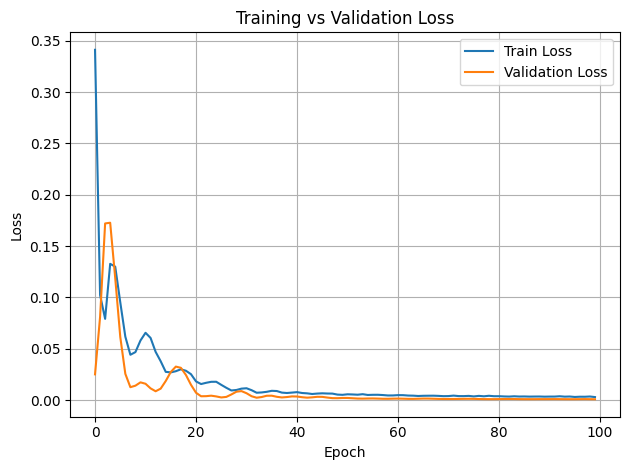

In [7]:
train_losses, val_losses = train_model(
    model, X_train, y_train, X_val, y_val, loss_fn, optimizer,epochs=100,patience=20
)


RMSE: 1.5371
MAE : 1.0413
MAPE: 2.7248%
R²  : 0.7690


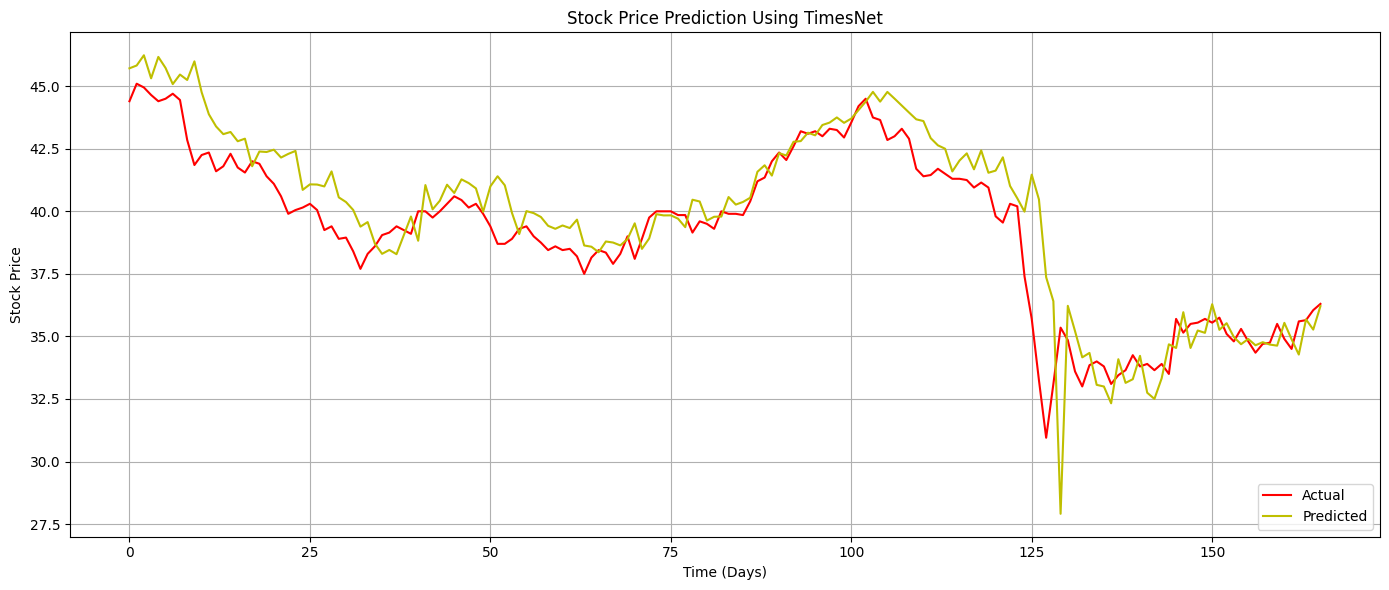

In [8]:
def evaluate(preds, actuals):

    pred_flat = preds.flatten()
    actual_flat = actuals.flatten()

    rmse = mean_squared_error(actual_flat, pred_flat, squared=False)
    mae = mean_absolute_error(actual_flat, pred_flat)
    mape = np.mean(np.abs((actual_flat - pred_flat) / actual_flat)) * 100
    r2 = r2_score(actual_flat, pred_flat)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R²  : {r2:.4f}")
    
model.eval()
with torch.no_grad():
    # Giả sử model output và y_test chỉ là cột 'close'
    preds = model(X_test.to(device)).cpu().numpy()
    actuals = y_test.cpu().numpy()

    # Reshape về (n_samples, 1)
    preds = preds.reshape(-1, 1)
    actuals = actuals.reshape(-1, 1)

    # Vị trí cột 'close' trong scaler
    close_idx = ['close', 'volume'].index('close')

    # Tạo dummy array với 4 cột để đảo chuẩn hóa
    dummy_preds = np.zeros((preds.shape[0], 2))
    dummy_preds[:, close_idx] = preds.flatten()

    dummy_actuals = np.zeros((actuals.shape[0], 2))
    dummy_actuals[:, close_idx] = actuals.flatten()

    # Đảo chuẩn hóa
    preds_original = np.exp(scaler.inverse_transform(dummy_preds)[:, close_idx])
    actuals_original = np.exp(scaler.inverse_transform(dummy_actuals)[:, close_idx])

    # Đánh giá
    evaluate(preds_original, actuals_original)
def plot_data(y_true, y_pred):
    plt.figure(figsize=(14, 6))
    plt.plot(y_true, c='r', label='Actual')        # Giá trị thực tế (giá close thật)
    plt.plot(y_pred, c='y', label='Predicted')     # Giá trị dự đoán (giá close dự đoán)
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price')
    plt.title("Stock Price Prediction Using TimesNet")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_data(actuals_original, preds_original)

TIMESNET + SA

In [ ]:

seq_len = 20
pred_len = 1
# Tải dữ liệu và tiền xử lý
data = pd.read_csv('D:\Đồ án TN\sentiment_analysis\sentiment_score1.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data = data[['close', 'sentiment_sector', 'sentiment_direct_PLX']]
data['close'] = np.log(data['close'])
data['sentiment_sector'] = data['sentiment_sector'].shift(1)
data['sentiment_direct_PLX'] = data['sentiment_direct_PLX'].shift(1)
data.fillna(0, inplace=True) 
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
data[['close', 'sentiment_sector', 'sentiment_direct_PLX']] = scaler.fit_transform(data[['close', 'sentiment_sector', 'sentiment_direct_PLX']])

# Chia dữ liệu thành train, val, test (80% train, 10% validation, 10% test)
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
test_size = len(data) - train_size - val_size

train = data.iloc[:train_size]
val = data.iloc[train_size:train_size + val_size]
test = data.iloc[train_size + val_size:]

# Hàm tạo sequences
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len + 1):
        X.append(data.iloc[i:i+seq_len].values)  
        y.append(data.iloc[i+seq_len:i+seq_len+pred_len, 0])  
    return np.array(X), np.array(y)

# Tạo sequences cho các tập train, val, test
X_train, y_train = create_sequences(train, seq_len, pred_len)
X_val, y_val = create_sequences(val, seq_len, pred_len)
X_test, y_test = create_sequences(test, seq_len, pred_len)
# Convert dữ liệu sang tensor và thêm chiều cuối cho phù hợp với output model
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)

# In ra kích thước của các tập dữ liệu
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: torch.Size([1292, 20, 4]), torch.Size([1292, 1, 1])
Val: torch.Size([261, 20, 4]), torch.Size([261, 1, 1])
Test: torch.Size([262, 20, 4]), torch.Size([262, 1, 1])


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = {
    "input_dim": X_train.shape[2],
    "hidden_dim": 96,
    "pred_len": pred_len,
    "output_dim": 1,
    "n_blocks": 3,
    "kernel_size": 3,
    "dropout": 0.2,
}

model = TimesNet(config).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam( model.parameters(), lr=0.001, weight_decay=1e-5)



Epoch 1/100 - Train Loss: 0.8727 - Val Loss: 0.5964
Epoch 2/100 - Train Loss: 0.4105 - Val Loss: 0.6221
Epoch 3/100 - Train Loss: 0.4342 - Val Loss: 0.2163
Epoch 4/100 - Train Loss: 0.1384 - Val Loss: 0.0218
Epoch 5/100 - Train Loss: 0.0424 - Val Loss: 0.0332
Epoch 6/100 - Train Loss: 0.1075 - Val Loss: 0.0688
Epoch 7/100 - Train Loss: 0.1645 - Val Loss: 0.0551
Epoch 8/100 - Train Loss: 0.1369 - Val Loss: 0.0209
Epoch 9/100 - Train Loss: 0.0779 - Val Loss: 0.0092
Epoch 10/100 - Train Loss: 0.0333 - Val Loss: 0.0375
Epoch 11/100 - Train Loss: 0.0309 - Val Loss: 0.0851
Epoch 12/100 - Train Loss: 0.0581 - Val Loss: 0.1105
Epoch 13/100 - Train Loss: 0.0728 - Val Loss: 0.0983
Epoch 14/100 - Train Loss: 0.0643 - Val Loss: 0.0619
Epoch 15/100 - Train Loss: 0.0432 - Val Loss: 0.0257
Epoch 16/100 - Train Loss: 0.0213 - Val Loss: 0.0061
Epoch 17/100 - Train Loss: 0.0171 - Val Loss: 0.0047
Epoch 18/100 - Train Loss: 0.0260 - Val Loss: 0.0097
Epoch 19/100 - Train Loss: 0.0343 - Val Loss: 0.0106
Ep

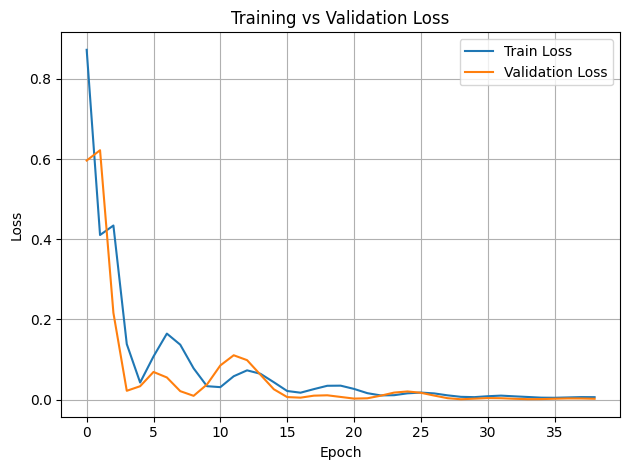

In [11]:
train_losses, val_losses = train_model(
    model, X_train, y_train, X_val, y_val, loss_fn, optimizer,epochs=100, patience=10
)


In [12]:
def evaluate(preds, actuals):

    pred_flat = preds.flatten()
    actual_flat = actuals.flatten()

    rmse = mean_squared_error(actual_flat, pred_flat, squared=False)
    mae = mean_absolute_error(actual_flat, pred_flat)
    mape = mean_absolute_percentage_error(actual_flat, pred_flat)
    r2 = r2_score(actual_flat, pred_flat)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R²  : {r2:.4f}")
    
model.eval()
with torch.no_grad():
    # Giả sử model output và y_test chỉ là cột 'close'
    preds = model(X_test.to(device)).cpu().numpy()
    actuals = y_test.cpu().numpy()

    # Reshape về (n_samples, 1)
    preds = preds.reshape(-1, 1)
    actuals = actuals.reshape(-1, 1)

    # Vị trí cột 'close' trong scaler
    close_idx = ['close', 'volume', 'sentiment_score', 'sentiment_score_PLX'].index('close')

    # Tạo dummy array với 4 cột để đảo chuẩn hóa
    dummy_preds = np.zeros((preds.shape[0], 4))
    dummy_preds[:, close_idx] = preds.flatten()

    dummy_actuals = np.zeros((actuals.shape[0], 4))
    dummy_actuals[:, close_idx] = actuals.flatten()

    # Đảo chuẩn hóa
    preds_original = np.exp(scaler.inverse_transform(dummy_preds)[:, close_idx])
    actuals_original = np.exp(scaler.inverse_transform(dummy_actuals)[:, close_idx])

    # Đánh giá
    evaluate(preds_original, actuals_original)


RMSE: 2.4335
MAE : 2.1986
MAPE: 0.0531
R²  : 0.6212


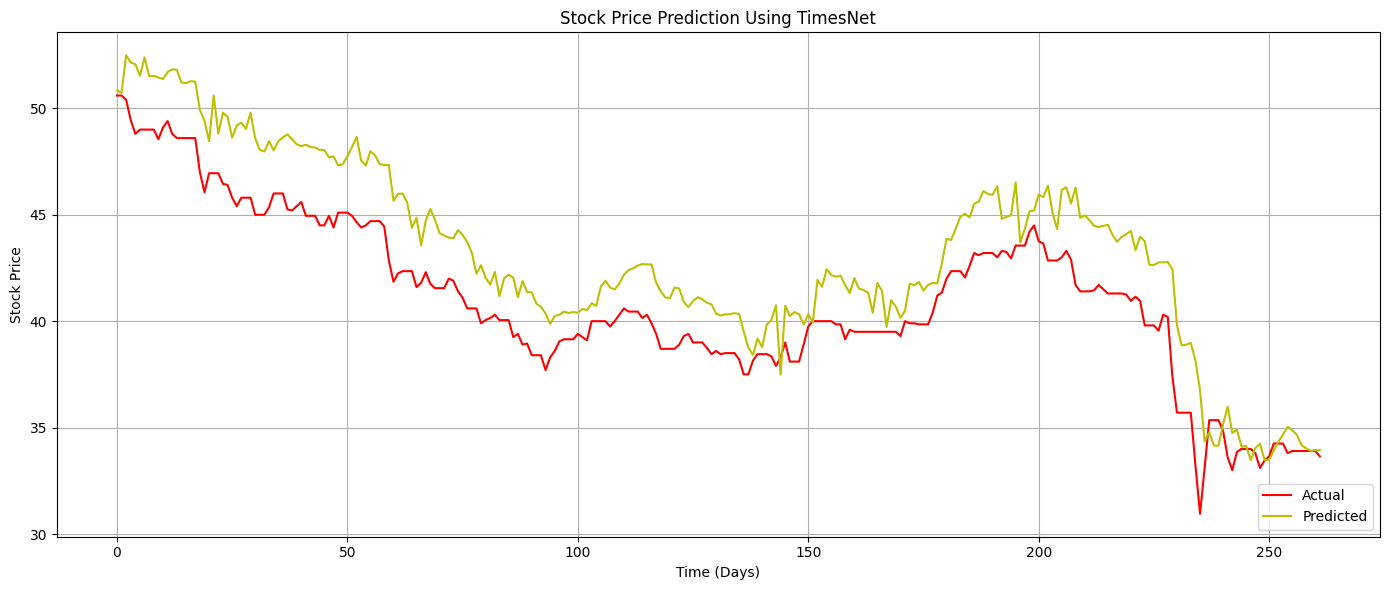

In [13]:
def plot_data(y_true, y_pred):
    plt.figure(figsize=(14, 6))
    plt.plot(y_true, c='r', label='Actual')        # Giá trị thực tế (giá close thật)
    plt.plot(y_pred, c='y', label='Predicted')     # Giá trị dự đoán (giá close dự đoán)
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price')
    plt.title("Stock Price Prediction Using TimesNet")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_data(actuals_original, preds_original)